### Importing our dependencies

In [1]:
import tensorflow as tf 

from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, GaussianNoise, GaussianDropout
from keras.layers import Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, SeparableConv2D
from keras.constraints import maxnorm
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras import regularizers, optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import np_utils

import plotly.graph_objects as go
import plotly.express as px

import json

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import seaborn as sns

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os
import cv2 

-----------

# <center>__I - EXPLORATORY DATA ANALYSIS__</center>

-----------

#### __SECTION PLAN__ 🎯

1. Data Exploration
2. Data Vizualisation

---------
### __1. Data Exploration__
---------

In [2]:
df_train_csv = pd.read_csv('train.csv')
df_test_csv =  pd.read_csv('test.csv')

In [3]:
print()
print('TRAINING dataset: ')
display(df_train_csv.head())

print()
print('Main statistics: ')
df_stats = df_train_csv.describe().apply(lambda s: s.apply('{0:.2f}'.format))
display(df_stats)

print()
print ('Missing values:')
# Here I created a function that will return the percentage and the quantity of missing values in our DF
def missing_values():
    
    missing = (pd.DataFrame(df_train_csv.isnull().sum()/df_train_csv.shape[0])*100).round(2)
    missing.columns = ['Percentage of Missing Values']
    missing['Number of Missing Values'] = pd.DataFrame(df_train_csv.isnull().sum())
    
    return missing.sort_values(by='Percentage of Missing Values', ascending=False)

display(missing_values())


TRAINING dataset: 


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0



Main statistics: 


,diagnosis
count,3662.00
mean,1.13
std,1.30
min,0.00
25%,0.00
50%,1.00
75%,2.00
max,4.00



Missing values:


,Percentage of Missing Values,Number of Missing Values
id_code,0.0,0
diagnosis,0.0,0


In [4]:
print()
print('TEST dataset: ')
display(df_test_csv.head())

print()
print ('Missing values:')
# Here I created a function that will return the percentage and the quantity of missing values in our DF
def missing_values():
    
    missing = (pd.DataFrame(df_test_csv.isnull().sum()/df_test_csv.shape[0])*100).round(2)
    missing.columns = ['Percentage of Missing Values']
    missing['Number of Missing Values'] = pd.DataFrame(df_test_csv.isnull().sum())
    
    return missing.sort_values(by='Percentage of Missing Values', ascending=False)

display(missing_values())


TEST dataset: 


,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4



Missing values:


,Percentage of Missing Values,Number of Missing Values
id_code,0.0,0


In [5]:
df_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [6]:
length_train = len(df_train_csv)
length_test = len(df_test_csv)

print (f'Number of images in the train data set: {length_train}')
print (f'Number of images in the test data set: {length_test}')

Number of images in the train data set: 3662
Number of images in the test data set: 1928


---------
### __2. Data Vizualisation__
---------

In [7]:
fig = go.Figure()

data = df_train_csv['diagnosis'].value_counts().sort_index()
x = df_train_csv['diagnosis'].value_counts().sort_index().index
y = df_train_csv['diagnosis'].value_counts().sort_index().values

fig_bar = px.bar(
    data, 
    x=x, 
    y=y, 
    )

fig_bar.update_layout(
            height=650,
            title='Distribution of Diagnosis in Training Data Set',
            title_font={"size": 20},
            xaxis_tickfont_size=14,
            yaxis_tickfont_size=14,
            xaxis={'title': 'Diagnosis', 'title_font': {'size': 16}},
            yaxis={'title': 'Frequency', 'title_font': {'size': 16}}
        )

fig_bar.show()

pd.DataFrame(df_train_csv['diagnosis'].value_counts())

,diagnosis
0,1805
2,999
1,370
4,295
3,193


In [8]:
Diagnosis = 'No DR', 'Moderate DR', 'Mild DR', 'Proliferative DR', 'Severe DR'
Proportion = df_train_csv.diagnosis.value_counts()

fig = px.pie(df_train_csv, values = Proportion, names = Diagnosis, title = 'Diagnosis proportion in Training Data Set')
fig.update_layout(margin=dict(t=50, b=20, l=0, r=0))
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=15)
fig.show()

In [9]:
IMGS_PATH_TRAIN = r'd:\1.JEDHA\5.Demo_Day\Eye_Disease\train_images'
IMGS_HEIGHT = 250
IMGS_WIDTH = 250
BATCH_SIZE = 64

In [10]:
df_train_csv['id_code'] = df_train_csv['id_code'].astype(str) + '.png'

Image name: a646c084928c.png, Diagnosis: 0
Image name: 2a08ed6bbcbc.png, Diagnosis: 1
Image name: 2776d70724d3.png, Diagnosis: 2
Image name: 498f143c0374.png, Diagnosis: 3
Image name: eaa0dfbd5024.png, Diagnosis: 4


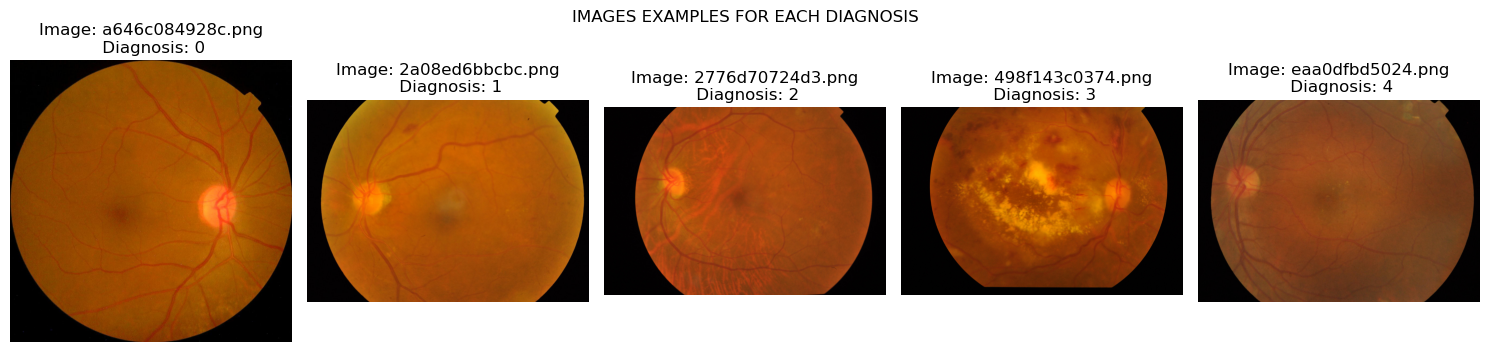

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,4))

for i in range(5):

    data_per_diagnosis = df_train_csv[df_train_csv['diagnosis'] == i].sample(1)

    img_name = data_per_diagnosis['id_code'].item()
    file_path = os.path.join(IMGS_PATH_TRAIN, img_name)
    
    with open (file_path, 'rb') as f:
      file_path = plt.imread(f, format='png')
      axes[i].imshow(file_path)
      axes[i].axis('off')
      axes[i].set_title(f"Image: {img_name}\n Diagnosis: {data_per_diagnosis['diagnosis'].item()}")
      print (f"Image name: {img_name}, Diagnosis: {data_per_diagnosis['diagnosis'].item()}")

      
plt.tight_layout()
plt.suptitle('IMAGES EXAMPLES FOR EACH DIAGNOSIS')
plt.show()


In [12]:
df_train_csv['diagnosis'] = df_train_csv['diagnosis'] .astype('str')

In [13]:
df_train_csv.head()

,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


-----------

# <center>__II - PREPROCESSING__</center>

-----------

In [14]:
IMGS_PATH_TRAIN = r'd:\1.JEDHA\5.Demo_Day\Eye_Disease\train_images'
IMGS_HEIGHT = 250
IMGS_WIDTH = 250
BATCH_SIZE = 64

In [15]:
img_generator = ImageDataGenerator(
    rotation_range=0, # Angle range for random image rotation
    width_shift_range=0.0, # Random shift of the image along width axis
    height_shift_range=0.0, # Random shift of the image along height axis
    brightness_range=(0.5,1), # Random brightness modification
    shear_range=0.0, # Random distortion of the image
    zoom_range=0.0, # Random zoom on the image
    channel_shift_range=50.0, # Random hue modification
    horizontal_flip=True, # Randomly flips image horizontally
    vertical_flip=True, # Randomly flips image virtically
    rescale=1/255, # Rescaling values from [0,255]->[0,1]
    validation_split=0.3 # Portion of the data that can be saved for validation
)

train_generator = img_generator.flow_from_dataframe(
    dataframe= df_train_csv, # the dataframe containing the filename and label column
    directory= IMGS_PATH_TRAIN, # the directory containing the image files
    x_col="id_code", # the name of the column with the filenames
    y_col="diagnosis", # the name of the column with the labels
    target_size=(IMGS_HEIGHT, IMGS_WIDTH),
    class_mode = "categorical", 
    batch_size= BATCH_SIZE, 
    shuffle = True,
    subset = "training"
)

val_generator = img_generator.flow_from_dataframe(
    dataframe= df_train_csv, # the dataframe containing the filename and label column
    directory= IMGS_PATH_TRAIN, # the directory containing the image files
    x_col="id_code", # the name of the column with the filenames
    y_col="diagnosis", # the name of the column with the labels
    target_size=(IMGS_HEIGHT, IMGS_WIDTH),
    class_mode = "categorical", 
    batch_size= BATCH_SIZE, 
    shuffle = True,
    subset = "validation"
)

Found 2564 validated image filenames belonging to 5 classes.
Found 1098 validated image filenames belonging to 5 classes.


In [16]:
y_train = df_train_csv['diagnosis']

y_train = np_utils.to_categorical(y_train)

num_classes = y_train.shape[1]

In [17]:
print(num_classes)

5


-----------

# <center>__III - MODEL BUILDING__</center>

-----------

In [18]:
def build_model():

    model = Sequential()
   
    model.add(Conv2D(15, (3, 3), input_shape=[250,250,3], activation='relu'))
    model.add(GaussianDropout(0.3))
    model.add(Conv2D(30, (5, 5), activation='relu', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(50, (5, 5), activation='relu'))
    model.add(Conv2D(50, (7, 7), activation='relu'))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax',
                    kernel_regularizer=regularizers.l2(0.0001)
                   ,activity_regularizer=regularizers.l1(0.01)))
  
    return model


In [19]:
model = build_model()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 15)      420       
                                                                 
 gaussian_dropout (GaussianD  (None, 248, 248, 15)     0         
 ropout)                                                         
                                                                 
 conv2d_1 (Conv2D)           (None, 244, 244, 30)      11280     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 122, 30)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 30)      8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 30)       0

In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer = Adam(learning_rate=0.0001, amsgrad=True), 
              metrics=['accuracy'])

In [22]:
es= EarlyStopping(monitor='val_loss', mode ='min', verbose = 1, patience = 20)
mc = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

In [23]:
"""model.fit(train_generator, 
            steps_per_epoch= len(train_generator),
            validation_data = val_generator,
            validation_steps = len(val_generator),
            epochs = 50,
            callbacks = [es, mc], 
            verbose = 1,
            )"""

'model.fit(train_generator, \n            steps_per_epoch= len(train_generator),\n            validation_data = val_generator,\n            validation_steps = len(val_generator),\n            epochs = 50,\n            callbacks = [es, mc], \n            verbose = 1,\n            )'

In [24]:
"""model.save(r'd:\1.JEDHA\5.Demo_Day\Eye_Disease\EyeDiseaseModel.h5')"""

"model.save(r'd:\x01.JEDHA\x05.Demo_Day\\Eye_Disease\\EyeDiseaseModel.h5')"

In [25]:
"""history_dict = model.history.history"""

'history_dict = model.history.history'

In [26]:
"""json.dump(history_dict, open(r'd:\1.JEDHA\5.Demo_Day\Eye_Disease\EyeDiseaseHistoryDict.json', 'w'))"""

"json.dump(history_dict, open(r'd:\x01.JEDHA\x05.Demo_Day\\Eye_Disease\\EyeDiseaseHistoryDict.json', 'w'))"

In [27]:
history_dict = json.load(open(r'd:\1.JEDHA\5.Demo_Day\Eye_Disease\EyeDiseaseHistoryDict.json', 'r'))

In [28]:
history = history_dict

In [29]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    y= history['loss'],
    mode='lines',
    name='Loss'))

fig.add_trace(go.Scatter(
    y= history['val_loss'],
    mode='lines',
    name='Val_Loss'))

fig.update_layout(
    height=650,
    title='<b>LOSS</b> on training and validation sets across epochs - <i>fig.1</i>',
    title_font={'size': 20},
    xaxis_title='EPOCHS',
    yaxis_title='CROSS ENTROPY', 
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,       
)

fig.show()

In [30]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history["accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          ),
                      go.Scatter(
                          y=history["val_accuracy"],
                          name="Validation accruracy",
                          mode="lines",
                          )
])

fig.update_layout(
    height=650,
    title='<b>ACCURACY</b> on training and validation sets across epochs - <i>fig.2</i>',
    title_font={'size': 20},
    xaxis_title='EPOCHS',
    yaxis_title='ACCURACY', 
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,     
)
fig.show()

-----------

# <center>__IV - MODEL EVALUATION__</center>

-----------

#### __SECTION PLAN__ 🎯

1. Confusion Matrix
2. Classification Report: Precision, Racall, F1_Score

---------
### __1. Confusion Matrix__
---------

In [31]:
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

18/18 [==============================] - 162s 9s/step


In [32]:
# number of true classes in val_generator
len(y_true)

1098

In [33]:
# number of samples and number of classes
y_pred.shape

(1098, 5)

In [34]:
# true classes from the val_generator
print(y_true)

[2, 4, 1, 0, 0, 4, 0, 2, 2, 1, 0, 2, 0, 3, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 2, 4, 2, 0, 0, 4, 0, 4, 2, 2, 4, 2, 1, 2, 4, 0, 3, 1, 2, 2, 2, 2, 0, 3, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 3, 0, 2, 0, 2, 0, 1, 3, 1, 0, 2, 0, 0, 3, 4, 2, 2, 0, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2, 0, 0, 0, 4, 4, 0, 0, 1, 2, 4, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 0, 4, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 4, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 2, 2, 2, 3, 2, 0, 3, 0, 0, 0, 0, 4, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0, 4, 0, 0, 2, 4, 0, 1, 0, 3, 0, 2, 2, 0, 1, 0, 3, 3, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 4, 1, 1, 2, 4, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 3, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 3, 0, 1, 2, 0, 4, 3, 0, 0, 0, 0, 3, 2, 0, 4, 0, 0, 0, 4, 3, 4, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 4, 0, 2, 0, 0, 2, 1, 0, 

In [35]:
# number of classes predicted
y_pred_classes.shape

(1098,)

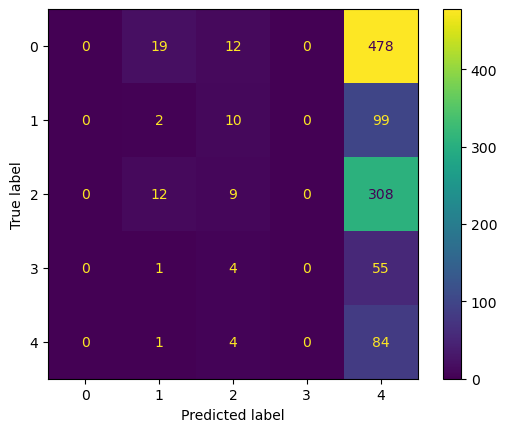

In [36]:
# confusion matrix in absolute value, how the 1098 samples have been predicted
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_classes)

In [37]:
cm = confusion_matrix(y_true, y_pred_classes)
cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
annot = np.around(cm, 2)

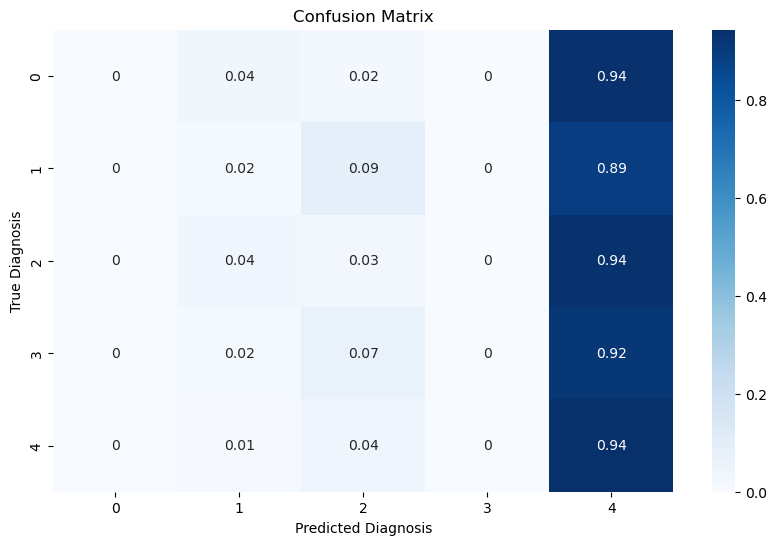

In [38]:
# confusion matrix in relative normalized value, how the 1098 samples have been predicted

plt.figure(figsize=(10,6))

sns.heatmap(cm, annot=annot, cmap=('Blues'))

plt.title('Confusion Matrix')
plt.xlabel('Predicted Diagnosis')
plt.ylabel('True Diagnosis')

plt.show()

Diagnosis 3 is very well predicted at 0.95 but that's it, the other diagnosis are not predicted at all

In [39]:
df_train_csv['diagnosis'].value_counts()/df_train_csv.shape[0]

0    0.492900
2    0.272802
1    0.101038
4    0.080557
3    0.052703
Name: diagnosis, dtype: float64

In [40]:
df_train_csv['diagnosis'].astype('int')

0       2
1       4
2       1
3       0
4       0
       ..
3657    2
3658    0
3659    2
3660    0
3661    2
Name: diagnosis, Length: 3662, dtype: int32

---------
### __2. Classification Report: Precision, Racall, F1_Score__
---------

In [41]:
print('Classification Report: \n\n',classification_report(y_true, y_pred_classes))

Classification Report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       509
           1       0.06      0.02      0.03       111
           2       0.23      0.03      0.05       329
           3       0.00      0.00      0.00        60
           4       0.08      0.94      0.15        89

    accuracy                           0.09      1098
   macro avg       0.07      0.20      0.05      1098
weighted avg       0.08      0.09      0.03      1098



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



__`NOTEBOOK END`__